In [2]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os

from blume.process import read, compute, plot_file
from blume.run import Results, ModelParameters
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

In [9]:
result = Results(varying_param="coupling", range=[0.1, 0.3, 0.5, 0.7, 0.9])
params = ModelParameters(model = "blume", T_range=(0.1, 1.75), step=0.001, tol=1e-9, max_steps=int(10e9), use_prev=True, chi=8 )
result.get(params)

coupling=0.1: 100%|██████████| 1650/1650 [01:25<00:00, 19.19it/s]


Saving data in folder: '11-05 15:00'
Done 



coupling=0.3: 100%|██████████| 1650/1650 [01:41<00:00, 16.22it/s]


Saving data in folder: '11-05 15:00'
Done 



coupling=0.5: 100%|██████████| 1650/1650 [01:49<00:00, 15.07it/s]


Saving data in folder: '11-05 15:00'
Done 



coupling=0.7: 100%|██████████| 1650/1650 [01:37<00:00, 16.89it/s]


Saving data in folder: '11-05 15:00'


In [16]:
# Make dir for saving the plots
dir = "11-05 15:00"
path_dir = f"data/{dir}/plots"
if not os.path.isdir(path_dir):
    os.mkdir(path_dir)

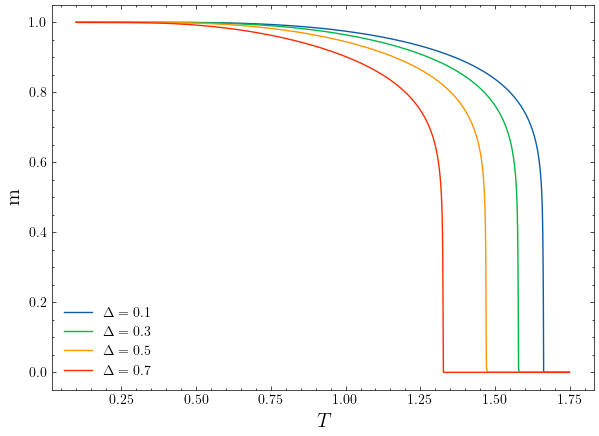

In [5]:
plt.figure(figsize=(7, 5))
T_range = (0.1, 3)
for delta in [0.1, 0.3, 0.5, 0.7]:
    line = plot_file(fn=f"coupling{delta}", range=T_range, prop=Prop.m, folder=dir)
    line.set_label(rf"$\Delta = {delta}$")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
#plt.ylim(0)
plt.savefig(f"{path_dir}/magnetizations")

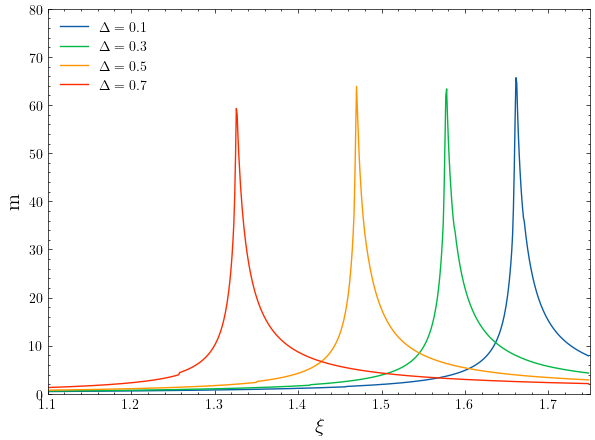

In [24]:
plt.figure(figsize=(7, 5))
T_range = (0.1, 3)
for delta in [0.1, 0.3, 0.5, 0.7]:
    line = plot_file(fn=f"coupling{delta}", range=T_range, prop=Prop.xi, folder=dir)
    line.set_label(rf"$\Delta = {delta}$")
plt.legend()
plt.xlim(1.1, 1.75)
plt.ylim(0, 80)
plt.ylabel(r"$\xi$", fontsize=15)
plt.xlabel(r"T", fontsize=15)
#plt.ylim(0)
plt.savefig(f"{path_dir}/correlation length")

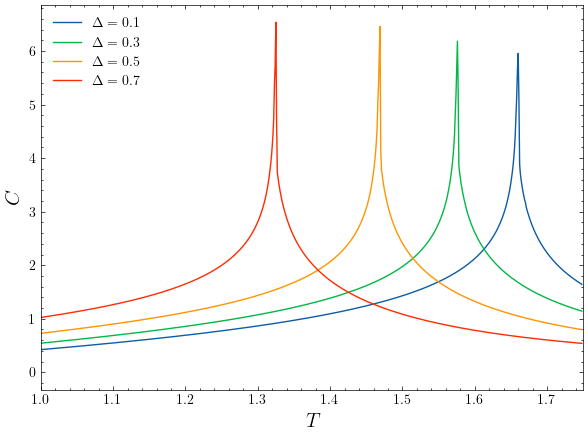

In [5]:
plt.figure(figsize=(7, 5))


for delta in [0.1, 0.3, 0.5, 0.7]:
    data = read("11-05 15:00", f"coupling{delta}")
    energies = compute(Prop.Es, data)
    temps = data["temperatures"]
    heats = np.diff(energies) / np.diff(temps)
    plt.plot(temps[:-1], heats, label=f"$\Delta = {delta}$")

plt.legend()
plt.xlim(1, 1.75)
plt.xlabel("$T$", fontsize=15)
plt.ylabel("$C$", fontsize=15)
plt.show()


In [6]:
result = Results(varying_param="chi", range=[2, 4, 8])
params = ModelParameters(model = "blume", T_range=(0.25, 1.75), step=0.001, tol=1e-9, max_steps=int(10e9), use_prev=True)
result.get(params)

chi=2: 100%|██████████| 1500/1500 [01:01<00:00, 24.43it/s] 


Saving data in folder: '11-05 15:18'
Done 



chi=4: 100%|██████████| 1500/1500 [01:24<00:00, 17.66it/s] 


Saving data in folder: '11-05 15:18'
Done 



chi=8: 100%|██████████| 1500/1500 [01:48<00:00, 13.83it/s] 


Saving data in folder: '11-05 15:18'
Done 



In [26]:
# Make dir for saving the plots
dir = "11-05 15:18"
path_dir = f"data/{dir}/plots"
if not os.path.isdir(path_dir):
    os.mkdir(path_dir)

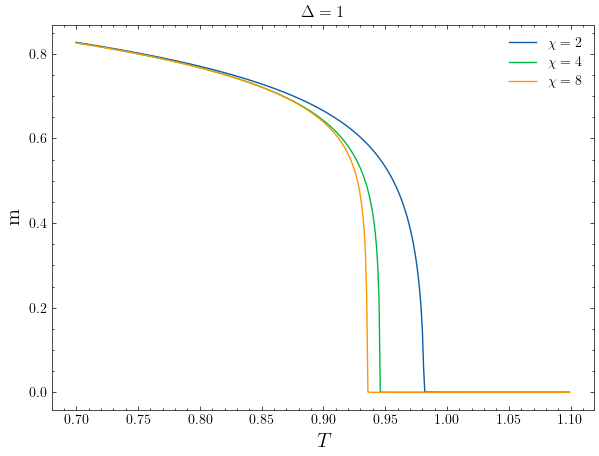

In [13]:
plt.figure(figsize=(7, 5))
T_range = (0.7, 1.1)
for chi in [2, 4, 8]:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop=Prop.m, folder=dir)
    line.set_label(rf"$\chi = {chi}$")
plt.title("$\Delta = 1$")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
#plt.ylim(0)
plt.savefig(f"{path_dir}/magnetizations")

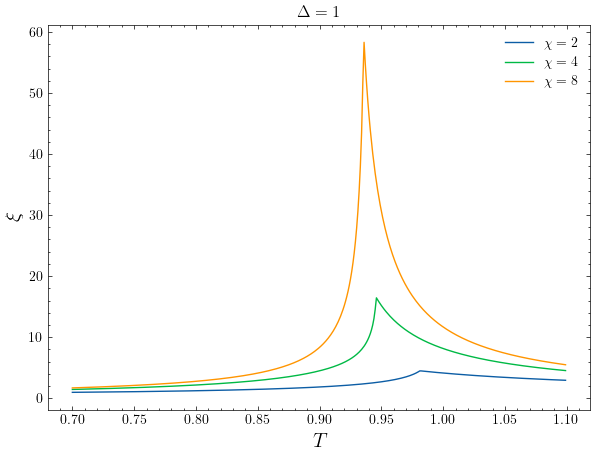

In [14]:
plt.figure(figsize=(7, 5))
T_range = (0.7, 1.1)
for chi in [2, 4, 8]:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop=Prop.xi, folder=dir)
    line.set_label(rf"$\chi = {chi}$")
plt.title("$\Delta = 1$")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$\xi$", fontsize=15)
#plt.ylim(0)
plt.savefig(f"{path_dir}/magnetizations")

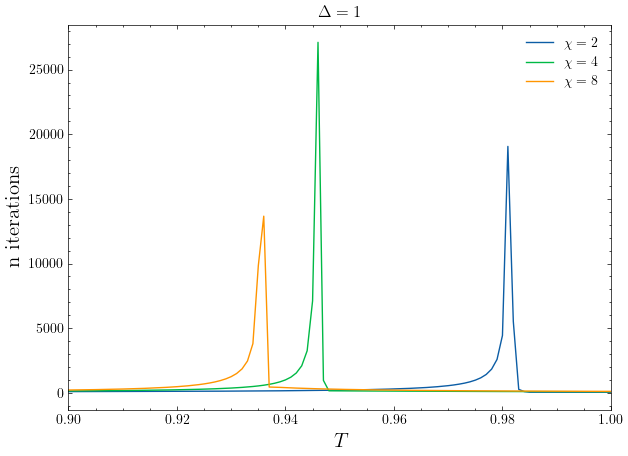

In [29]:
plt.figure(figsize=(7, 5))
T_range = (0.7, 1.1)
for chi in [2, 4, 8]:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop="number of iterations", folder=dir)
    line.set_label(rf"$\chi = {chi}$")
plt.title("$\Delta = 1$")
plt.legend()
plt.xlim(0.9, 1)
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"n iterations", fontsize=15)
#plt.ylim(0)
plt.savefig(f"{path_dir}/number of iterations")

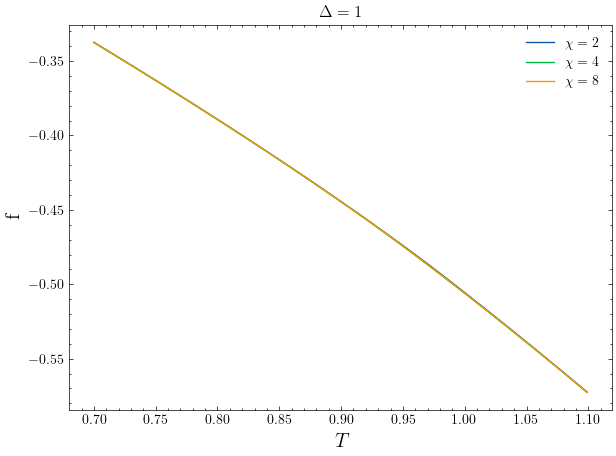

In [32]:
plt.figure(figsize=(7, 5))
T_range = (0.7, 1.1)
for chi in [2, 4, 8]:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop=Prop.f, folder=dir)
    line.set_label(rf"$\chi = {chi}$")
plt.title("$\Delta = 1$")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"f", fontsize=15)
#plt.ylim(0)
plt.savefig(f"{path_dir}/number of iterations")